In [1]:
from tensorflow.keras import optimizers,datasets,layers
import tensorflow as tf


In [22]:
from keras.datasets import cifar10
(train_x, train_y), (test_x, test_y) = cifar10.load_data()


In [ ]:
train_x.shape
#DATA IS 3D (RGB) IMAGES

(50000, 32, 32, 3)

In [24]:
train_x=train_x.reshape(50000,32,32,3)
test_x=test_x.reshape(10000,32,32,3)

In [25]:
train_x.shape

(50000, 32, 32, 3)

In [26]:
print(train_x[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [ ]:
# train_x=train_x.astype('float32')/255
# test_x=test_x.astype('float32')/255

# print(train_x[0])
# print(train_y[0])

[[[0.23137255 0.24313726 0.24705882]
  [0.16862746 0.18039216 0.1764706 ]
  [0.19607843 0.1882353  0.16862746]
  ...
  [0.61960787 0.5176471  0.42352942]
  [0.59607846 0.49019608 0.4       ]
  [0.5803922  0.4862745  0.40392157]]

 [[0.0627451  0.07843138 0.07843138]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509805 0.21568628]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117648 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215687 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941177 0.19607843]
  [0.47058824 0.32941177 0.19607843]
  [0.42745098 0.28627452 0.16470589]]

 ...

 [[0.8156863  0.6666667  0.3764706 ]
  [0.7882353  0.6        0.13333334]
  [0.7764706  0.6313726  0.10196079]
  ...
  [0.627451   0.52156866 0.27450982]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333334 0.07843138]]

 [[0.7058824  0.54509807 0.3764706 ]
  [0.6784314  0.48235294 0.16470589]


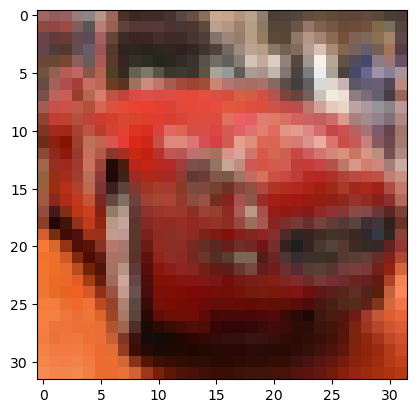

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_x[5])



In [28]:
train_y=tf.keras.utils.to_categorical(train_y)
test_y=tf.keras.utils.to_categorical(test_y)

In [29]:
train_y[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [30]:
train_x.shape

(50000, 32, 32, 3)

In [31]:
from tensorflow.keras import activations,Sequential


In [43]:
model=Sequential()

In [44]:
model.add(layers.Input(shape=(32,32,3)))

model.add(layers.Conv2D(filters= 32,kernel_size=5,strides=1,padding='same',activation=tf.nn.relu,input_shape=(28,28,1)))

In [45]:
model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2),padding='valid'))

In [46]:
model.add(layers.Conv2D(filters= 64,kernel_size=6,strides=(1,1),padding='same',activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(3,3),strides=(3,3),padding='valid'))
model.add(layers.Flatten())
model.add(layers.Dense(units=128,activation=tf.nn.relu))
model.add(layers.Dense(units=10,activation=tf.nn.softmax))

In [47]:
train_x=train_x.reshape(50000,32,32,3)
test_x=test_x.reshape(10000,32,32,3)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
hist=model.fit(x=train_x,y=train_y,epochs=10,batch_size=128,validation_split=0.2)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 66ms/step - accuracy: 0.2360 - loss: 9.4962 - val_accuracy: 0.4439 - val_loss: 1.5497
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 63ms/step - accuracy: 0.4749 - loss: 1.4669 - val_accuracy: 0.4868 - val_loss: 1.4610
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 63ms/step - accuracy: 0.5422 - loss: 1.2923 - val_accuracy: 0.5280 - val_loss: 1.3394
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 70ms/step - accuracy: 0.5900 - loss: 1.1639 - val_accuracy: 0.5358 - val_loss: 1.3190
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 124ms/step - accuracy: 0.6270 - loss: 1.0695 - val_accuracy: 0.5594 - val_loss: 1.2851
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 34s 108ms/step - accuracy: 0.6643 - loss: 0.9595 - val_accuracy: 0.5609 - val_loss: 1.3058
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 68ms/step - accuracy: 0.6857 - loss: 0.9007 - val_accuracy: 0.5845 - val_loss: 1.2727
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 68ms/step - accuracy: 0.7221 - loss: 0.7919 

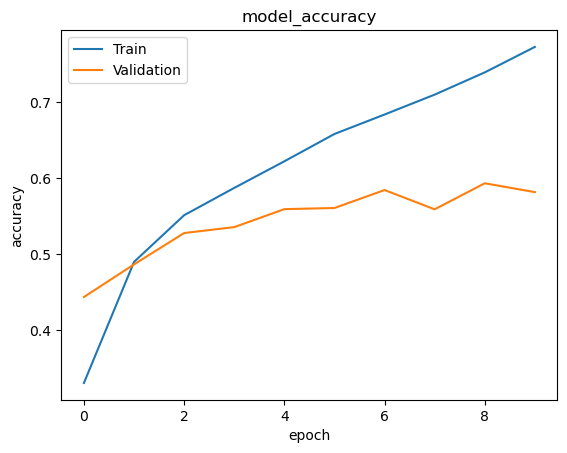

In [49]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()


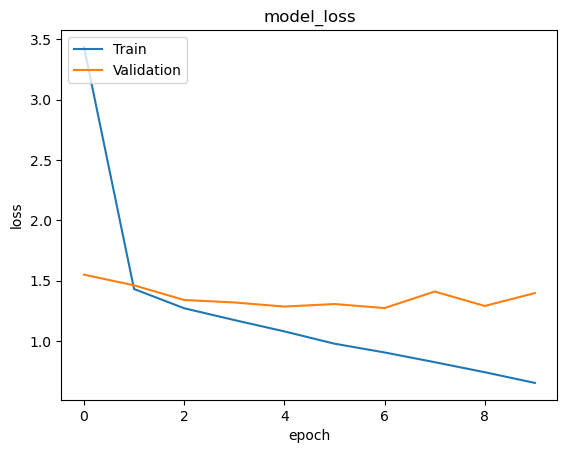

In [50]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()
